In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
import matplotlib
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
greens = ["#004225", "#529471", "#48b5c4", "#529471"]
semi_balck = '#4F6272'
plt.rcParams.update(matplotlib.rcParamsDefault)

In [2]:
results_path = "/Volumes/noamaz/modularity/digits/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "digits"
num_layers = '3'
n_features = 3
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"digits_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/digits_multi_arch/{res_folder}"

In [3]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = "2023-11-26-13-45-59_all_results_from_teach_archs_results_with_motifs_1000_ep_no_duplicates_fixed.csv"
lgbm_folder_name = 'exp_2023_11_27_11_00_0_nice_features'


In [4]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [7]:
corrlated_features_values = pd.read_csv(
    f"{results_path}/{res_folder}/feature_correlation/2023-11-06-16-07-16_all_data.csv")
correlated_features_csv_name = "2023-11-06-16-07-16_feature_correlation.csv"
correlated_features = pd.read_csv(f"{results_path}/{res_folder}/feature_correlation/{correlated_features_csv_name}",
                                  index_col=0)

In [25]:
first_analsis = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)


(96726, 29)

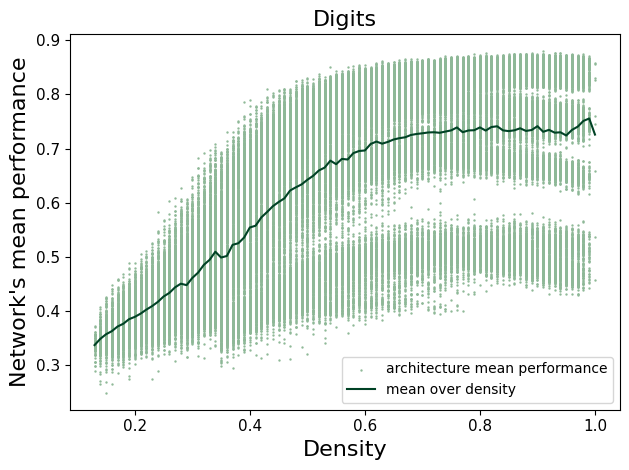

In [9]:
x_metric_name = 'density'
y_metric_name = 'mean_performance'

x_data = first_analsis[x_metric_name]
means_y = []
mean_x = []
plt.figure()
for x in sorted(first_analsis[x_metric_name].unique()):
    means_y.append(first_analsis[y_metric_name][x_data == x].mean())
    mean_x.append(x)
#x_data = x_data + np.random.normal(-0.008, 0.008, x_data.shape[0])
plt.scatter(x_data, first_analsis[y_metric_name], c=COLORS[3], s=0.5, label='architecture mean performance')

plt.plot(mean_x, means_y, c=greens[0], label='mean over density')
plt.legend()
plt.ylabel("Network's mean performance", fontsize=16)
plt.xlabel('Density', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}.png")
plt.show()

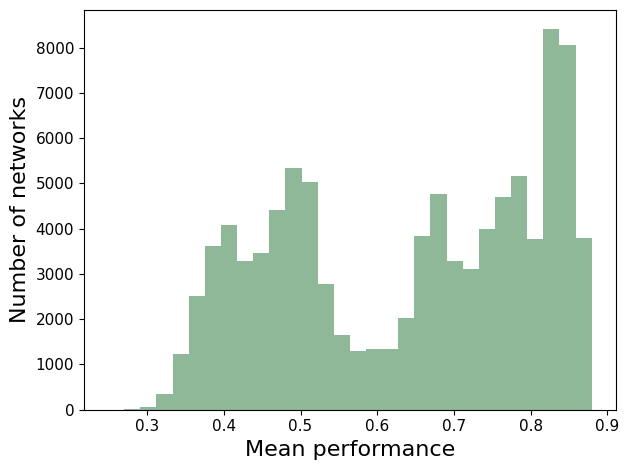

In [10]:
plt.hist(first_analsis['mean_performance'], color=COLORS[3], bins=30)
plt.xlabel('Mean performance', fontsize=16)
plt.ylabel('Number of networks', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.title(f"{task.capitalize()}", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_mean_performance_hist.png")
plt.show()

In [11]:
neurons_feature_names = [f'neurons_in_layer_{i}' for i in range(1, int(num_layers))]
dims = [f"{i}_{j}" for i, j, in first_analsis[neurons_feature_names].values.tolist()]
dims.sort()
dims_to_num = {
    dim: i + 1
    for i, dim in enumerate(set(dims))
}
first_analsis['dims'] = dims

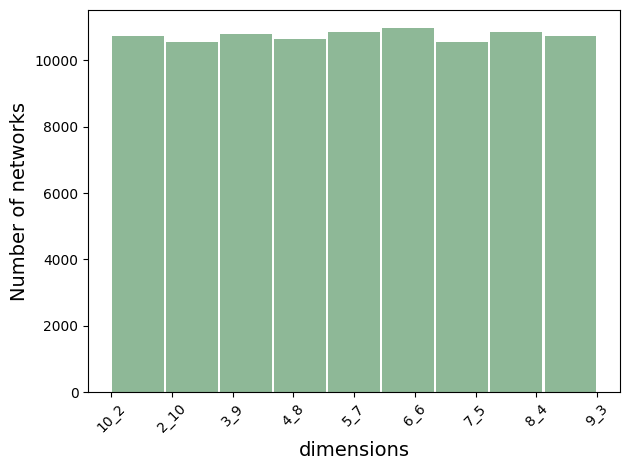

In [26]:
plt.hist(first_analsis['dims'], color=COLORS[3], bins=len(set(dims)), align='mid', rwidth=0.95)
plt.xticks(rotation=45)
plt.xlabel('dimensions', fontsize=14)
plt.ylabel('Number of networks', fontsize=14)
#axs[k].set_xlabel(f_name,  fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_dims_hist.png")
plt.show()

In [13]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0", axis=1)

In [14]:
selected_feature_names = list(selected_features_res.columns)[:-1]

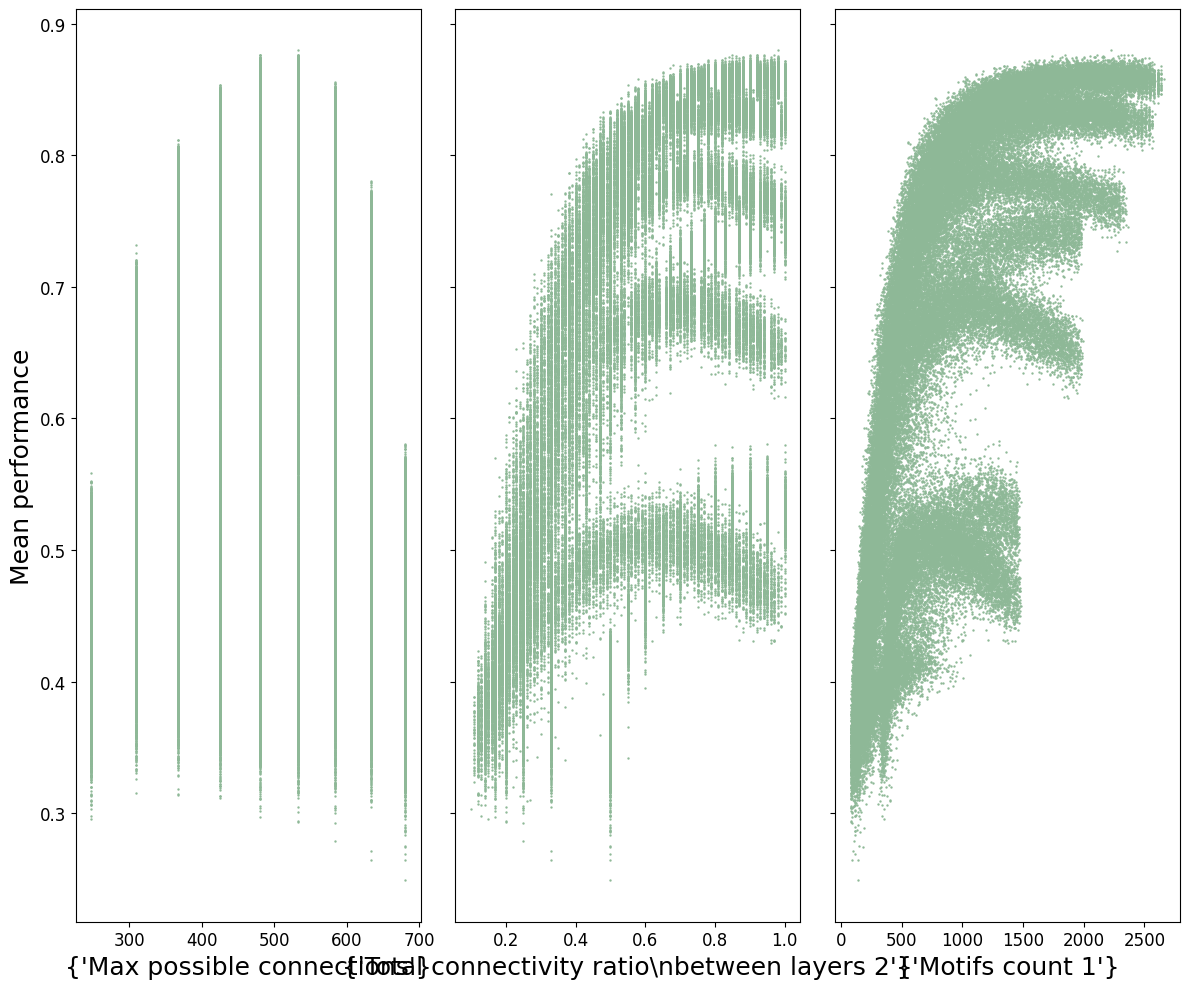

In [45]:
num_columns = int(np.ceil(len(selected_feature_names) // 3))
num_rows = int(np.ceil(len(selected_feature_names) //num_columns))
fig, axs = plt.subplots(num_columns, num_rows, figsize=(12, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
if num_columns >1 and num_rows >1:
    r, c, = axs.shape
    for i in range(r):
        for j in range(c):
            idxs.append((i, j))
else:
    for j in range( axs.shape[0]):
        idxs.append(j)
for k, (f_name, loc_) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[loc_].scatter(x_data, selected_features_res['label'], c=COLORS[3], s= 0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:22]}\n{f_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    axs[loc_].set_xlabel(f"{name.capitalize()}", fontsize=18)
    #axs[i, j].set_ylim(0,1)
    axs[loc_].tick_params(axis='x', labelsize=12)
    axs[loc_].tick_params(axis='y', labelsize=12)
#axs[1].set_ylabel(f"Mean performance", fontsize=18)
axs[0].set_ylabel(f"Mean performance", fontsize=18)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_fetaures_dist.png")


In [5]:
for file in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"):
    if 'feature_selectio' in file:
        feature_selection = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}")
lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/teach_archs_regression_feature_selection_results_1kep"
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_res = pd.concat([feature_selection_res, temp], ignore_index=True)
feature_selection_res = feature_selection_res.sort_values('num_features')

In [6]:
feature_selection_res

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features
2,0,926,0.139637,0.137970,0.000101,0.000100,0.630673,0.637132,1
1,0,287,0.045015,0.035310,0.000035,0.000027,0.950521,0.972526,2
8,0,840,0.025539,0.023228,0.000019,0.000017,0.986543,0.988845,3
5,0,907,0.029331,0.026163,0.000024,0.000021,0.979273,0.984105,4
10,0,953,0.030768,0.026571,0.000025,0.000021,0.976005,0.983294,5
4,0,999,0.029638,0.027215,0.000024,0.000022,0.979106,0.982426,6
12,0,746,0.026509,0.024932,0.000020,0.000019,0.985187,0.986963,7
11,0,826,0.026564,0.023718,0.000020,0.000018,0.985057,0.988487,8
14,0,984,0.024361,0.023019,0.000018,0.000017,0.987817,0.989312,9
13,0,927,0.025545,0.023659,0.000019,0.000018,0.986613,0.988645,10


In [15]:
feature_selection_res2 = feature_selection_res[feature_selection_res['num_features'] <300]
max_features_mape =feature_selection_res2['best mape test'][feature_selection_res2['num_features'] == feature_selection_res2['num_features'].max()].item()
feature_selection_res2['mape_ratio_min'] = feature_selection_res2['best mape test'].min() / feature_selection_res2['best mape test']
feature_selection_res2['r2_ratio_max'] =  feature_selection_res2['best r2 test'] / feature_selection_res2['best r2 test'].max()

feature_selection_res2['mape_ops_ratio_min'] = feature_selection_res2['best mape test'] / feature_selection_res2['best mape test'].min()
feature_selection_res2['mape_ratio'] = max_features_mape / feature_selection_res2['best mape test']
feature_selection_res2['mape_ops_ratio'] = feature_selection_res2['best mape test'] / max_features_mape
feature_selection_res2[['mape_ratio', 'mape_ops_ratio', 'mape_ratio_min', 'mape_ops_ratio_min','best mape test','best r2 test', 'r2_ratio_max', 'num_features']]

,mape_ratio,mape_ops_ratio,mape_ratio_min,mape_ops_ratio_min,best mape test,best r2 test,r2_ratio_max,num_features
2,0.139178,7.185055,0.136919,7.303587,0.137970,0.637132,0.641666,1
1,0.543826,1.838825,0.535000,1.869160,0.035310,0.972526,0.979446,2
8,0.826676,1.209664,0.813260,1.229619,0.023228,0.988845,0.995881,3
5,0.733938,1.362513,0.722027,1.384990,0.026163,0.984105,0.991108,4
10,0.722672,1.383754,0.710943,1.406582,0.026571,0.983294,0.990291,5
4,0.705585,1.417265,0.694133,1.440645,0.027215,0.982426,0.989418,6
12,0.770182,1.298395,0.757682,1.319814,0.024932,0.986963,0.993987,7
11,0.809602,1.235175,0.796463,1.255551,0.023718,0.988487,0.995521,8
14,0.834213,1.198735,0.820674,1.218510,0.023019,0.989312,0.996352,9
13,0.811627,1.232093,0.798455,1.252418,0.023659,0.988645,0.995680,10


In [19]:
feature_selection_res2[feature_selection_res2['num_features'].isin((3,20,100))][[
    'mape_ratio_min',
    'best mape test',
        'best mape train',
    'best r2 test',
        'best r2 train',
    'r2_ratio_max',
    'num_features',
]]

,mape_ratio_min,best mape test,best mape train,best r2 test,best r2 train,r2_ratio_max,num_features
8,0.813260,0.023228,0.025539,0.988845,0.986543,0.995881,3
3,0.914827,0.020650,0.020522,0.991419,0.991757,0.998474,20
0,1.000000,0.018891,0.018974,0.992934,0.992941,1.000000,100


In [20]:
0.988/0.992

0.9959677419354839

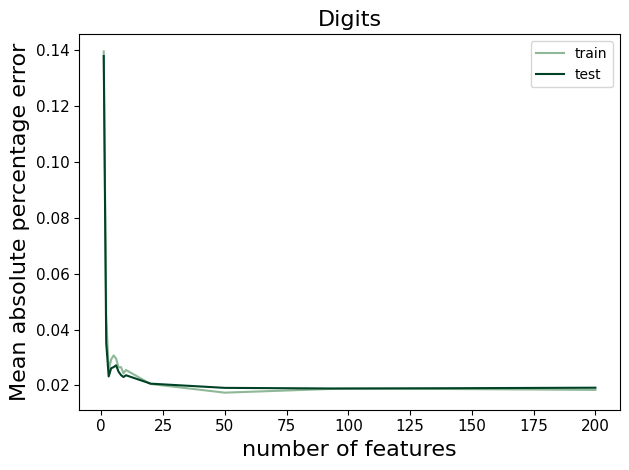

In [39]:
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=COLORS[3])
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=greens[0])

plt.xlabel('number of features', fontsize=16)
plt.ylabel(f'Mean absolute percentage error', fontsize=16)
plt.legend()
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

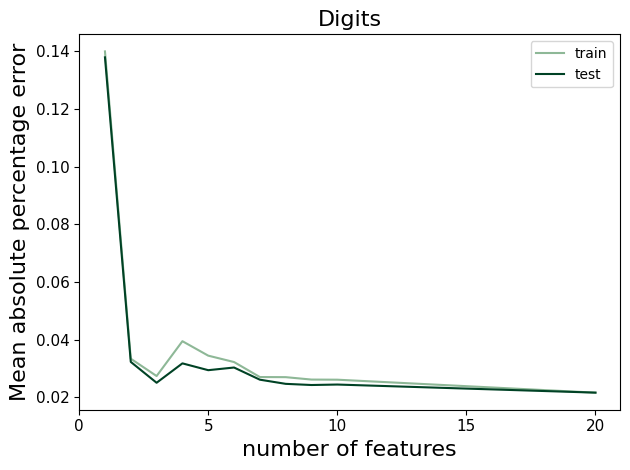

In [15]:
feature_selection_res_small =feature_selection_res[feature_selection_res['num_features']<=20]
plt.plot(feature_selection_res_small['num_features'], feature_selection_res_small['best mape train'], label='train', c=COLORS[3])
plt.plot(feature_selection_res_small['num_features'], feature_selection_res_small['best mape test'], label='test', c=greens[0])

plt.xlabel('number of features', fontsize=16)
plt.ylabel(f'Mean absolute percentage error', fontsize=16)
plt.legend()
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(np.arange(21)[::5], fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_zoom.png")
plt.show()

In [8]:
glob_inds = []
feature_selection_res_by_glob = pd.DataFrame()
for folder_name in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality"):
    glob_ind = folder_name.split('glob_')[1].replace('_', '.')
    glob_inds.append(glob_ind)
    lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality/{folder_name}/teach_archs_regression_feature_selection_results_1kep"
    for file_name in os.listdir(lgb_res_nn_path):
        if 'best.csv' not in file_name:
            continue
        temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
        temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
        temp['glob_ind'] = glob_ind
        feature_selection_res_by_glob = pd.concat([feature_selection_res_by_glob, temp], ignore_index=True)
feature_selection_res_by_glob = feature_selection_res_by_glob.sort_values(['glob_ind', 'num_features'])

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_86820/3119539614.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


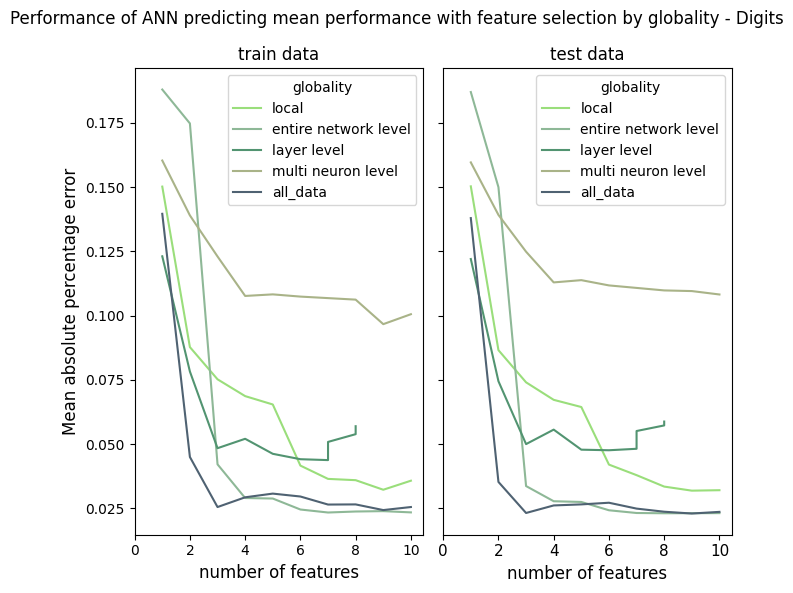

In [27]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
sorted_greens = [ '#9ADE7B',  COLORS[3], "#529471", "#A9B388",  "#004225"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 10]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_greens[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_greens[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 10]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
         label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0] + 1)[::2])
ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0] + 1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_86820/2978849237.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


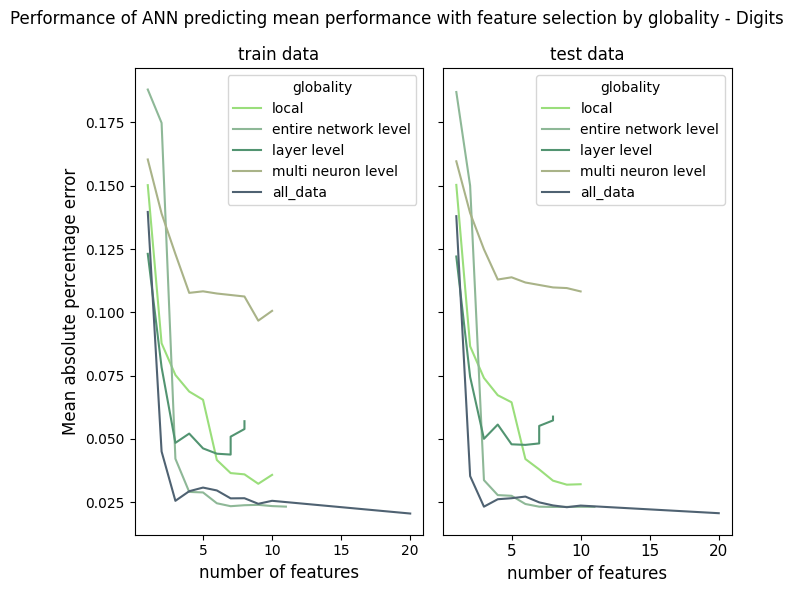

In [29]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
sorted_greens = [ '#9ADE7B',  COLORS[3], "#529471", "#A9B388",  "#004225"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 40]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_greens[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_greens[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 20]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
         label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
#ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])
#ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_long.png")
plt.show()

In [41]:
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{n_features}_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)


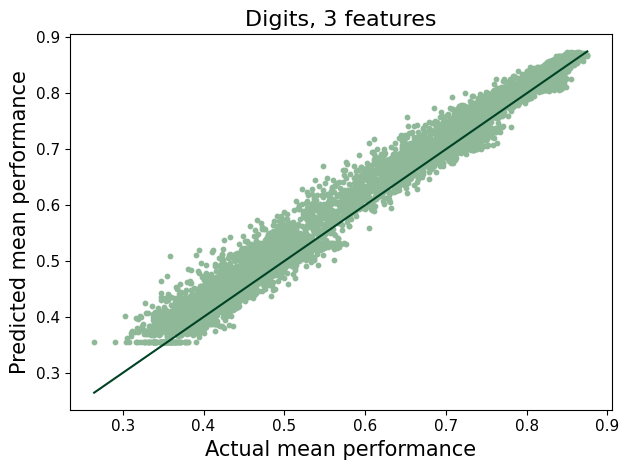

In [42]:
plt.scatter(model_prediction_res['test_label'], model_prediction_res['test_pred'], s=10, c=COLORS[3])
start = min(model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min())
stop = max(model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=greens[0])
plt.ylabel('Predicted mean performance', fontsize=15)
plt.xlabel('Actual mean performance', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}, {n_features} features",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()

In [25]:
fetureas = [100,20, 3]
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[2]}_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)
model_res_path_sat = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[1]}_prediction_results.csv"
model_prediction_res_set = pd.read_csv(model_res_path_sat)
model_res_path_max = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[0]}_prediction_results.csv"
model_prediction_res_max = pd.read_csv(model_res_path_max)

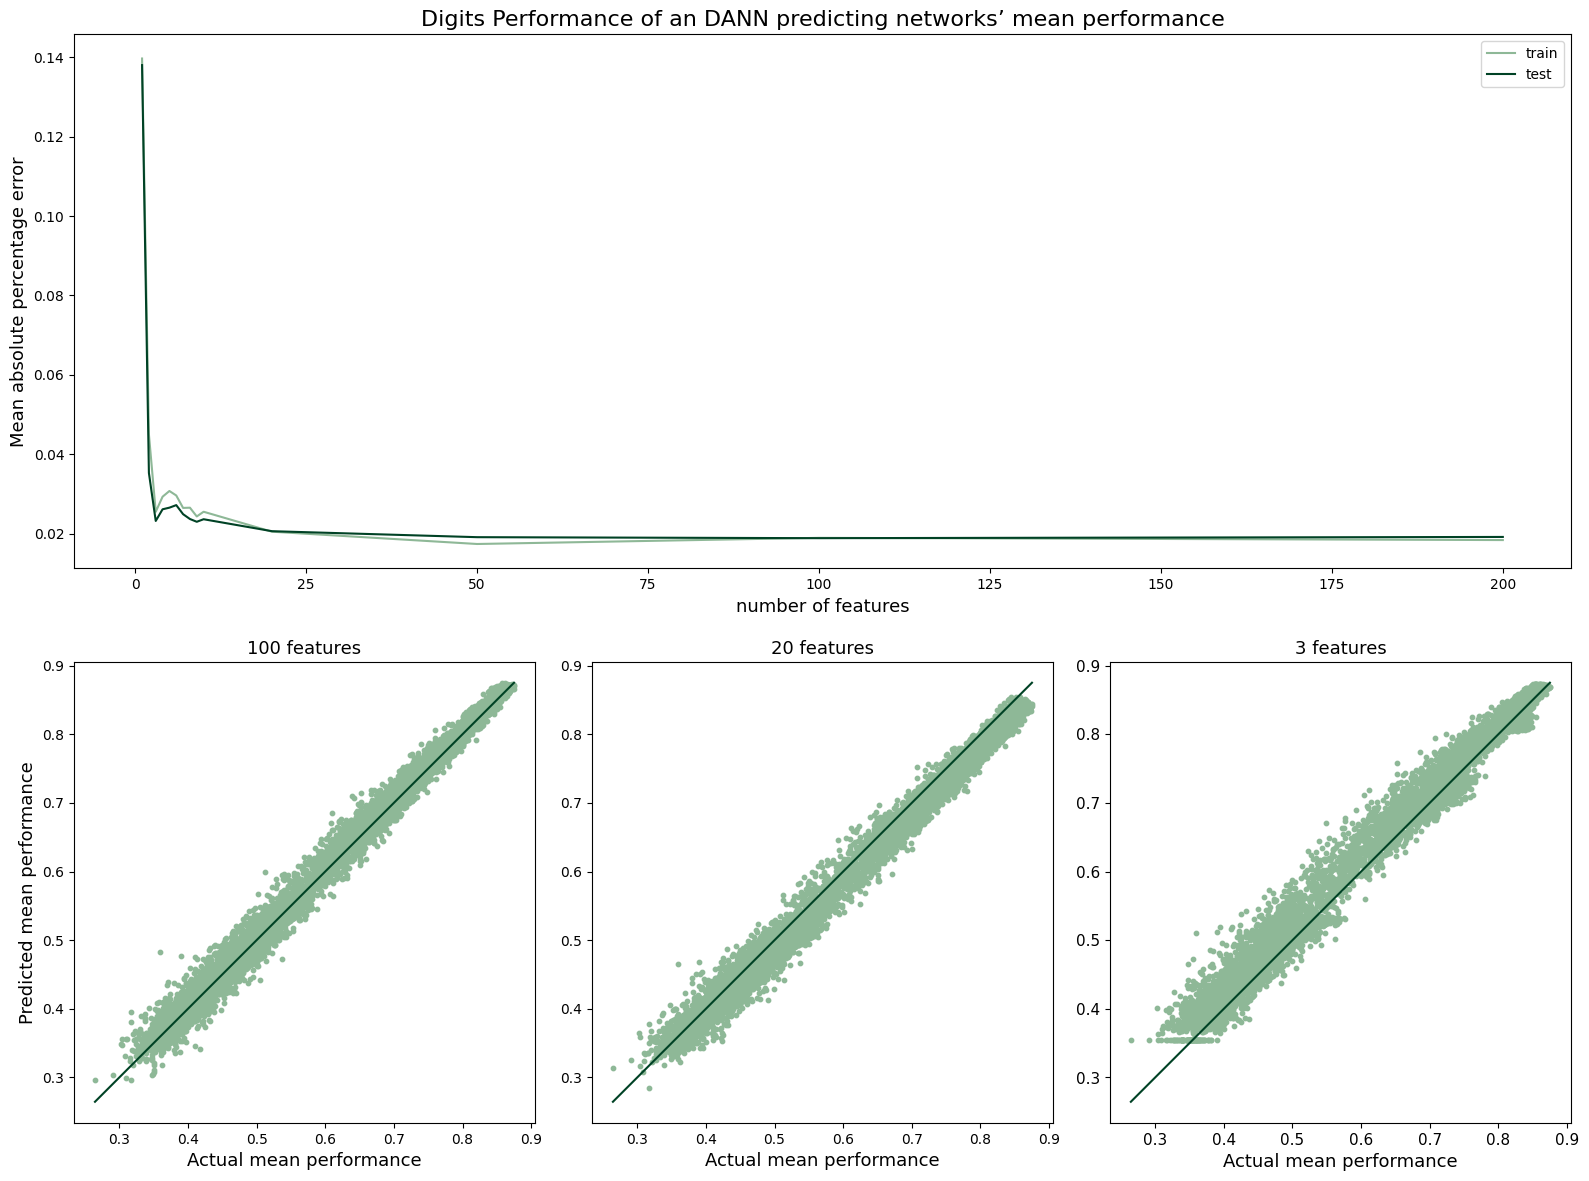

In [26]:
models =  (model_prediction_res_max, model_prediction_res_set, model_prediction_res)
start = min(min( model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min()) for model in models)
stop = max(max( model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max()) for model in models)
fig = plt.figure(figsize=(16,12))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(234)
ax2 = fig.add_subplot(235,  sharex=ax1, sharey=ax1 )
ax3 = fig.add_subplot(236,  sharex=ax1, sharey=ax1 )

for ax, model, num_fet in zip((ax1, ax2, ax3),models, fetureas):
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=COLORS[3])
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=greens[0])
    ax.set_title(
    f"{num_fet} features",
    wrap=True, fontsize=13)
    ax.set_xlabel('Actual mean performance', fontsize=13)

ax1.set_ylabel('Predicted mean performance', fontsize=13)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,wrap=True, fontsize=14)

ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=COLORS[3])
ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=greens[0])

ax0.set_xlabel('number of features', fontsize=13)
ax0.set_ylabel(f'Mean absolute percentage error', fontsize=13)
ax0.legend()
ax0.set_title(
    f"{task.capitalize()} Performance of an DANN predicting networks’ mean performance",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [6]:
baseline_path = f"{results_path}/{res_folder}/random_feature_selection/{n_features}_features/teach_archs_regression_random_feature_selection_results"
res_baseline = pd.DataFrame()
for file_name in os.listdir(baseline_path):
    if '_output_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{baseline_path}/{file_name}")
    res_baseline = pd.concat([res_baseline, temp], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/noamaz/modularity/digits//digits_3_layers/random_feature_selection/3_features/teach_archs_regression_random_feature_selection_results'

In [18]:
correlated_path = f"{results_path}/{res_folder}/feature_correlation/{n_features}_features"
for file_name in os.listdir(correlated_path):
    if '_output_best.csv' not in file_name:
        continue
    res_corr = pd.read_csv(f"{correlated_path}/{file_name}")

In [19]:
globality_path = f"{results_path}/{res_folder}/feature_globality/{n_features}_features/teach_archs_regression_random_feature_selection_results"
globality_baseline_res = pd.DataFrame()
for file_name in os.listdir(globality_path):
    if '_output_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{globality_path}/{file_name}")
    globality_baseline_res = pd.concat([globality_baseline_res, temp], ignore_index=True)

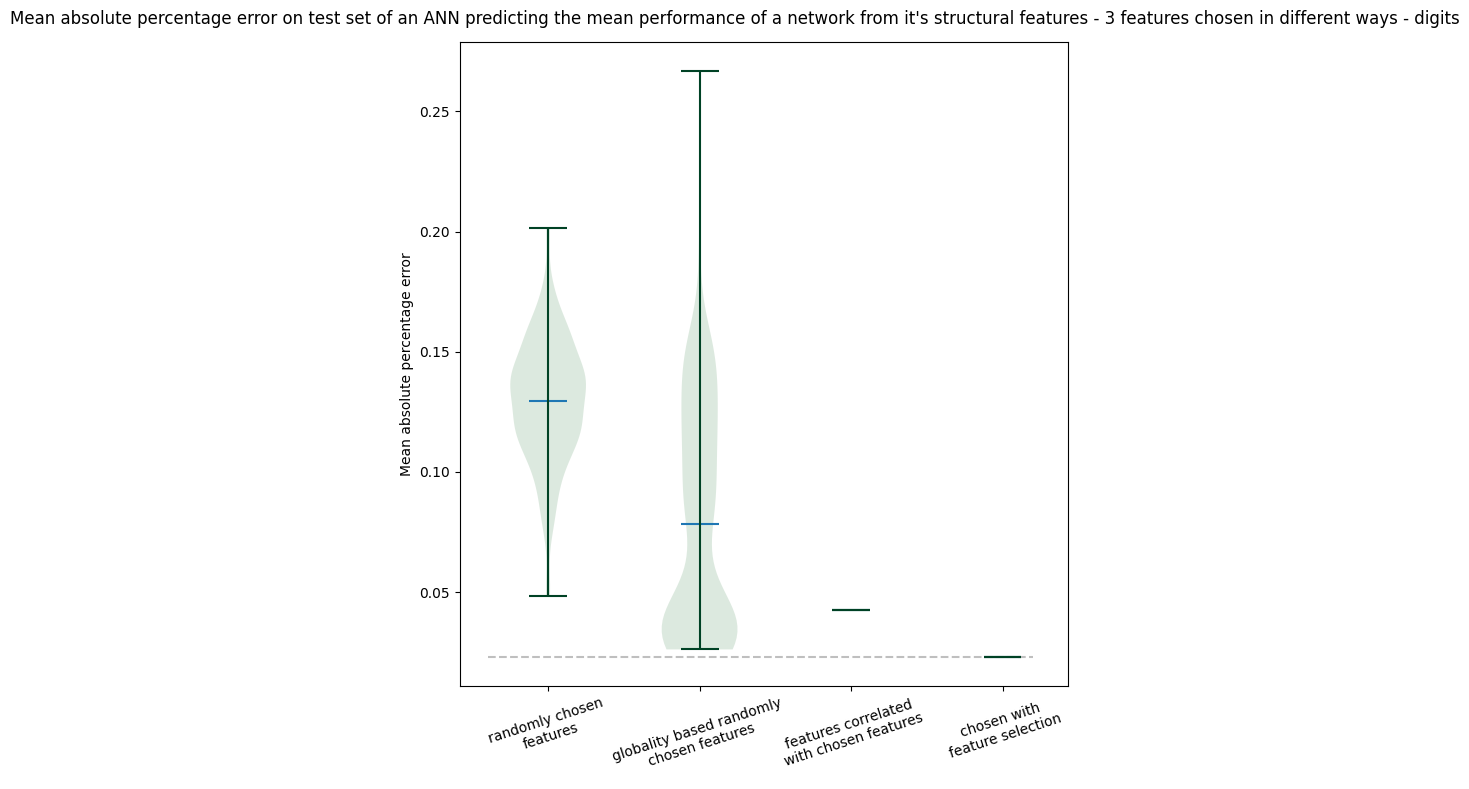

In [28]:
all_data = [
    res_baseline['best mape test'],
    globality_baseline_res['best mape test'],
    res_corr['best mape test'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures',
    'globality based randomly\nchosen features',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )

plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(blues[1])
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = parts[partname]
    vp.set_edgecolor(blues[0])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

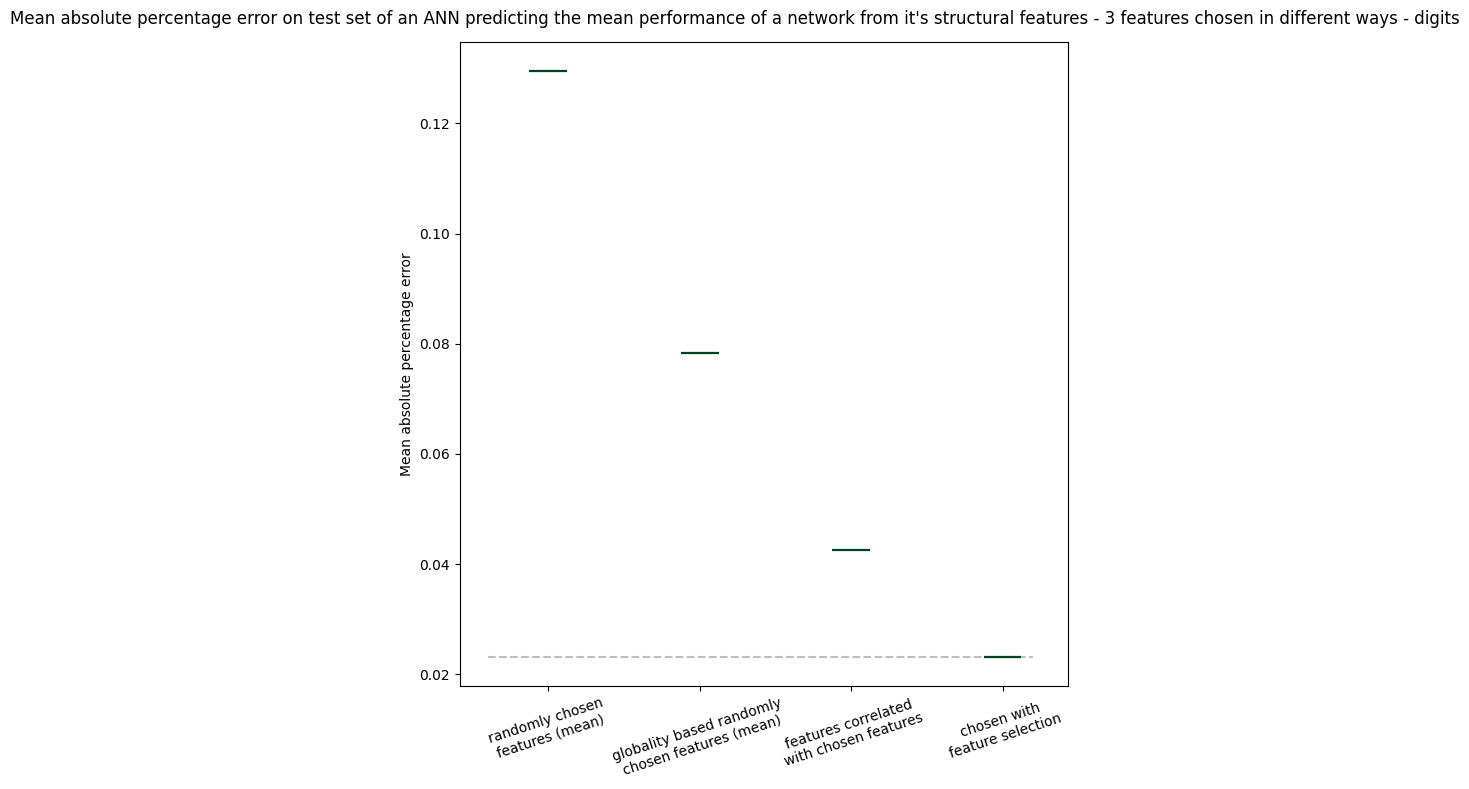

In [29]:
all_data = [
    res_baseline['best mape test'].mean(),
    globality_baseline_res['best mape test'].mean(),
    res_corr['best mape test'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures (mean)',
    'globality based randomly\nchosen features (mean)',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )
plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(blues[1])
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = parts[partname]
    vp.set_edgecolor(blues[0])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_mean_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

In [30]:
orignaly_chosen_features_values = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0",
                                                                                                      axis=1)
originaly_selected_feature_names = list(orignaly_chosen_features_values.columns)[:-1]

corrlated_selected_feature_names = [
    correlated_features[feature].drop(index=feature).idxmax()
    for feature in originaly_selected_feature_names
]

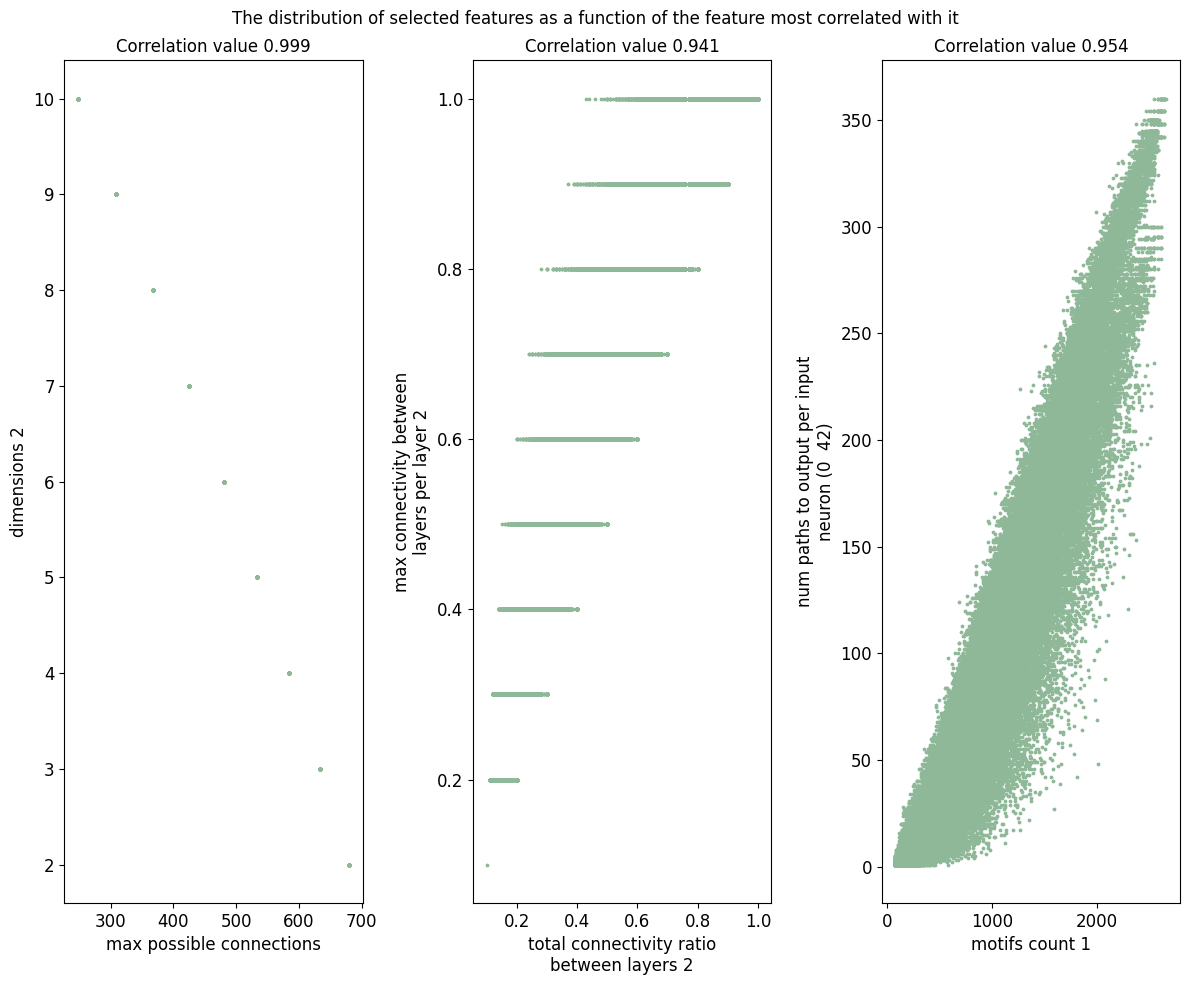

In [33]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    axs[i, j].scatter(corrlated_features_values[origin_f_name], corrlated_features_values[coor_f_name],
                      color=blues[1], s=3)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(f"The distribution of selected features as a function of the feature most correlated with it")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_correlated_features_dist.png")


In [34]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    x_data = corrlated_features_values[origin_f_name]
    y_data = corrlated_features_values[coor_f_name]
    axs[i, j].scatter(x_data + np.random.normal(scale=0.5, size=x_data.shape[0]),
                      y_data + np.random.normal(scale=0.5, size=y_data.shape[0]),
                      color=blues[1], s=0.2)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(
    f"The distribution of selected features as a function of the feature most correlated with it - noise added")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_noise_correlated_features_dist.png")


,connectivity_ratio,num_connections,max_possible_connections,out_connections_per_layer_(0_ 3),out_connections_per_layer_(0_ 4),out_connections_per_layer_(0_ 6),out_connections_per_layer_(0_ 11),out_connections_per_layer_(0_ 12),out_connections_per_layer_(0_ 21),out_connections_per_layer_(0_ 22),...,num_involved_neurons_in_paths_per_input_neuron_(0_ 53),num_involved_neurons_in_paths_per_input_neuron_(0_ 59),num_involved_neurons_in_paths_per_input_neuron_(0_ 60),num_involved_neurons_in_paths_per_input_neuron_(0_ 61),num_involved_neurons_in_paths_per_input_neuron_(0_ 62),num_involved_neurons_in_paths_per_input_neuron_(0_ 63),motifs_count_0,motifs_count_1,motifs_count_2,dimensions_2
connectivity_ratio,1.000000,0.760074,0.149877,0.570908,0.569641,0.570688,0.567874,0.568642,0.569045,0.570694,...,0.809793,0.808362,0.810403,0.808341,0.808827,0.808690,0.717681,0.917963,0.796677,0.149348
num_connections,0.760074,1.000000,0.489066,0.891250,0.890261,0.891498,0.889561,0.890285,0.890863,0.891044,...,0.606745,0.606455,0.606240,0.605558,0.606698,0.606623,0.968430,0.768063,0.975019,0.487334
max_possible_connections,0.149877,0.489066,1.000000,0.557820,0.557861,0.558198,0.558915,0.559909,0.559718,0.557157,...,0.122803,0.120243,0.123489,0.122903,0.121300,0.120319,0.467981,0.018020,0.372998,0.999069
out_connections_per_layer_(0_ 3),0.570908,0.891250,0.557820,1.000000,0.820364,0.822405,0.819405,0.819198,0.819798,0.819441,...,0.449656,0.449857,0.449756,0.449280,0.449852,0.450292,0.874886,0.587290,0.859027,0.557073
out_connections_per_layer_(0_ 4),0.569641,0.890261,0.557861,0.820364,1.000000,0.821321,0.818094,0.819699,0.820770,0.820024,...,0.448379,0.449154,0.448135,0.448275,0.449585,0.448786,0.874326,0.584666,0.858127,0.557189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
num_involved_neurons_in_paths_per_input_neuron_(0_ 63),0.808690,0.606623,0.120319,0.450292,0.448786,0.450048,0.445575,0.447560,0.450467,0.448608,...,0.767627,0.767727,0.768255,0.766135,0.766947,1.000000,0.525313,0.706745,0.590389,0.119154
motifs_count_0,0.717681,0.968430,0.467981,0.874886,0.874326,0.875402,0.873925,0.873719,0.874191,0.874943,...,0.525444,0.524840,0.525113,0.524584,0.525441,0.525313,1.000000,0.695268,0.982805,0.471523
motifs_count_1,0.917963,0.768063,0.018020,0.587290,0.584666,0.586212,0.583638,0.585099,0.584957,0.586701,...,0.706827,0.705935,0.706413,0.705448,0.706989,0.706745,0.695268,1.000000,0.800627,0.027970
motifs_count_2,0.796677,0.975019,0.372998,0.859027,0.858127,0.859311,0.857499,0.857615,0.857973,0.859183,...,0.590650,0.589898,0.590401,0.589657,0.590670,0.590389,0.982805,0.800627,1.000000,0.372236


In [36]:
correlated_features

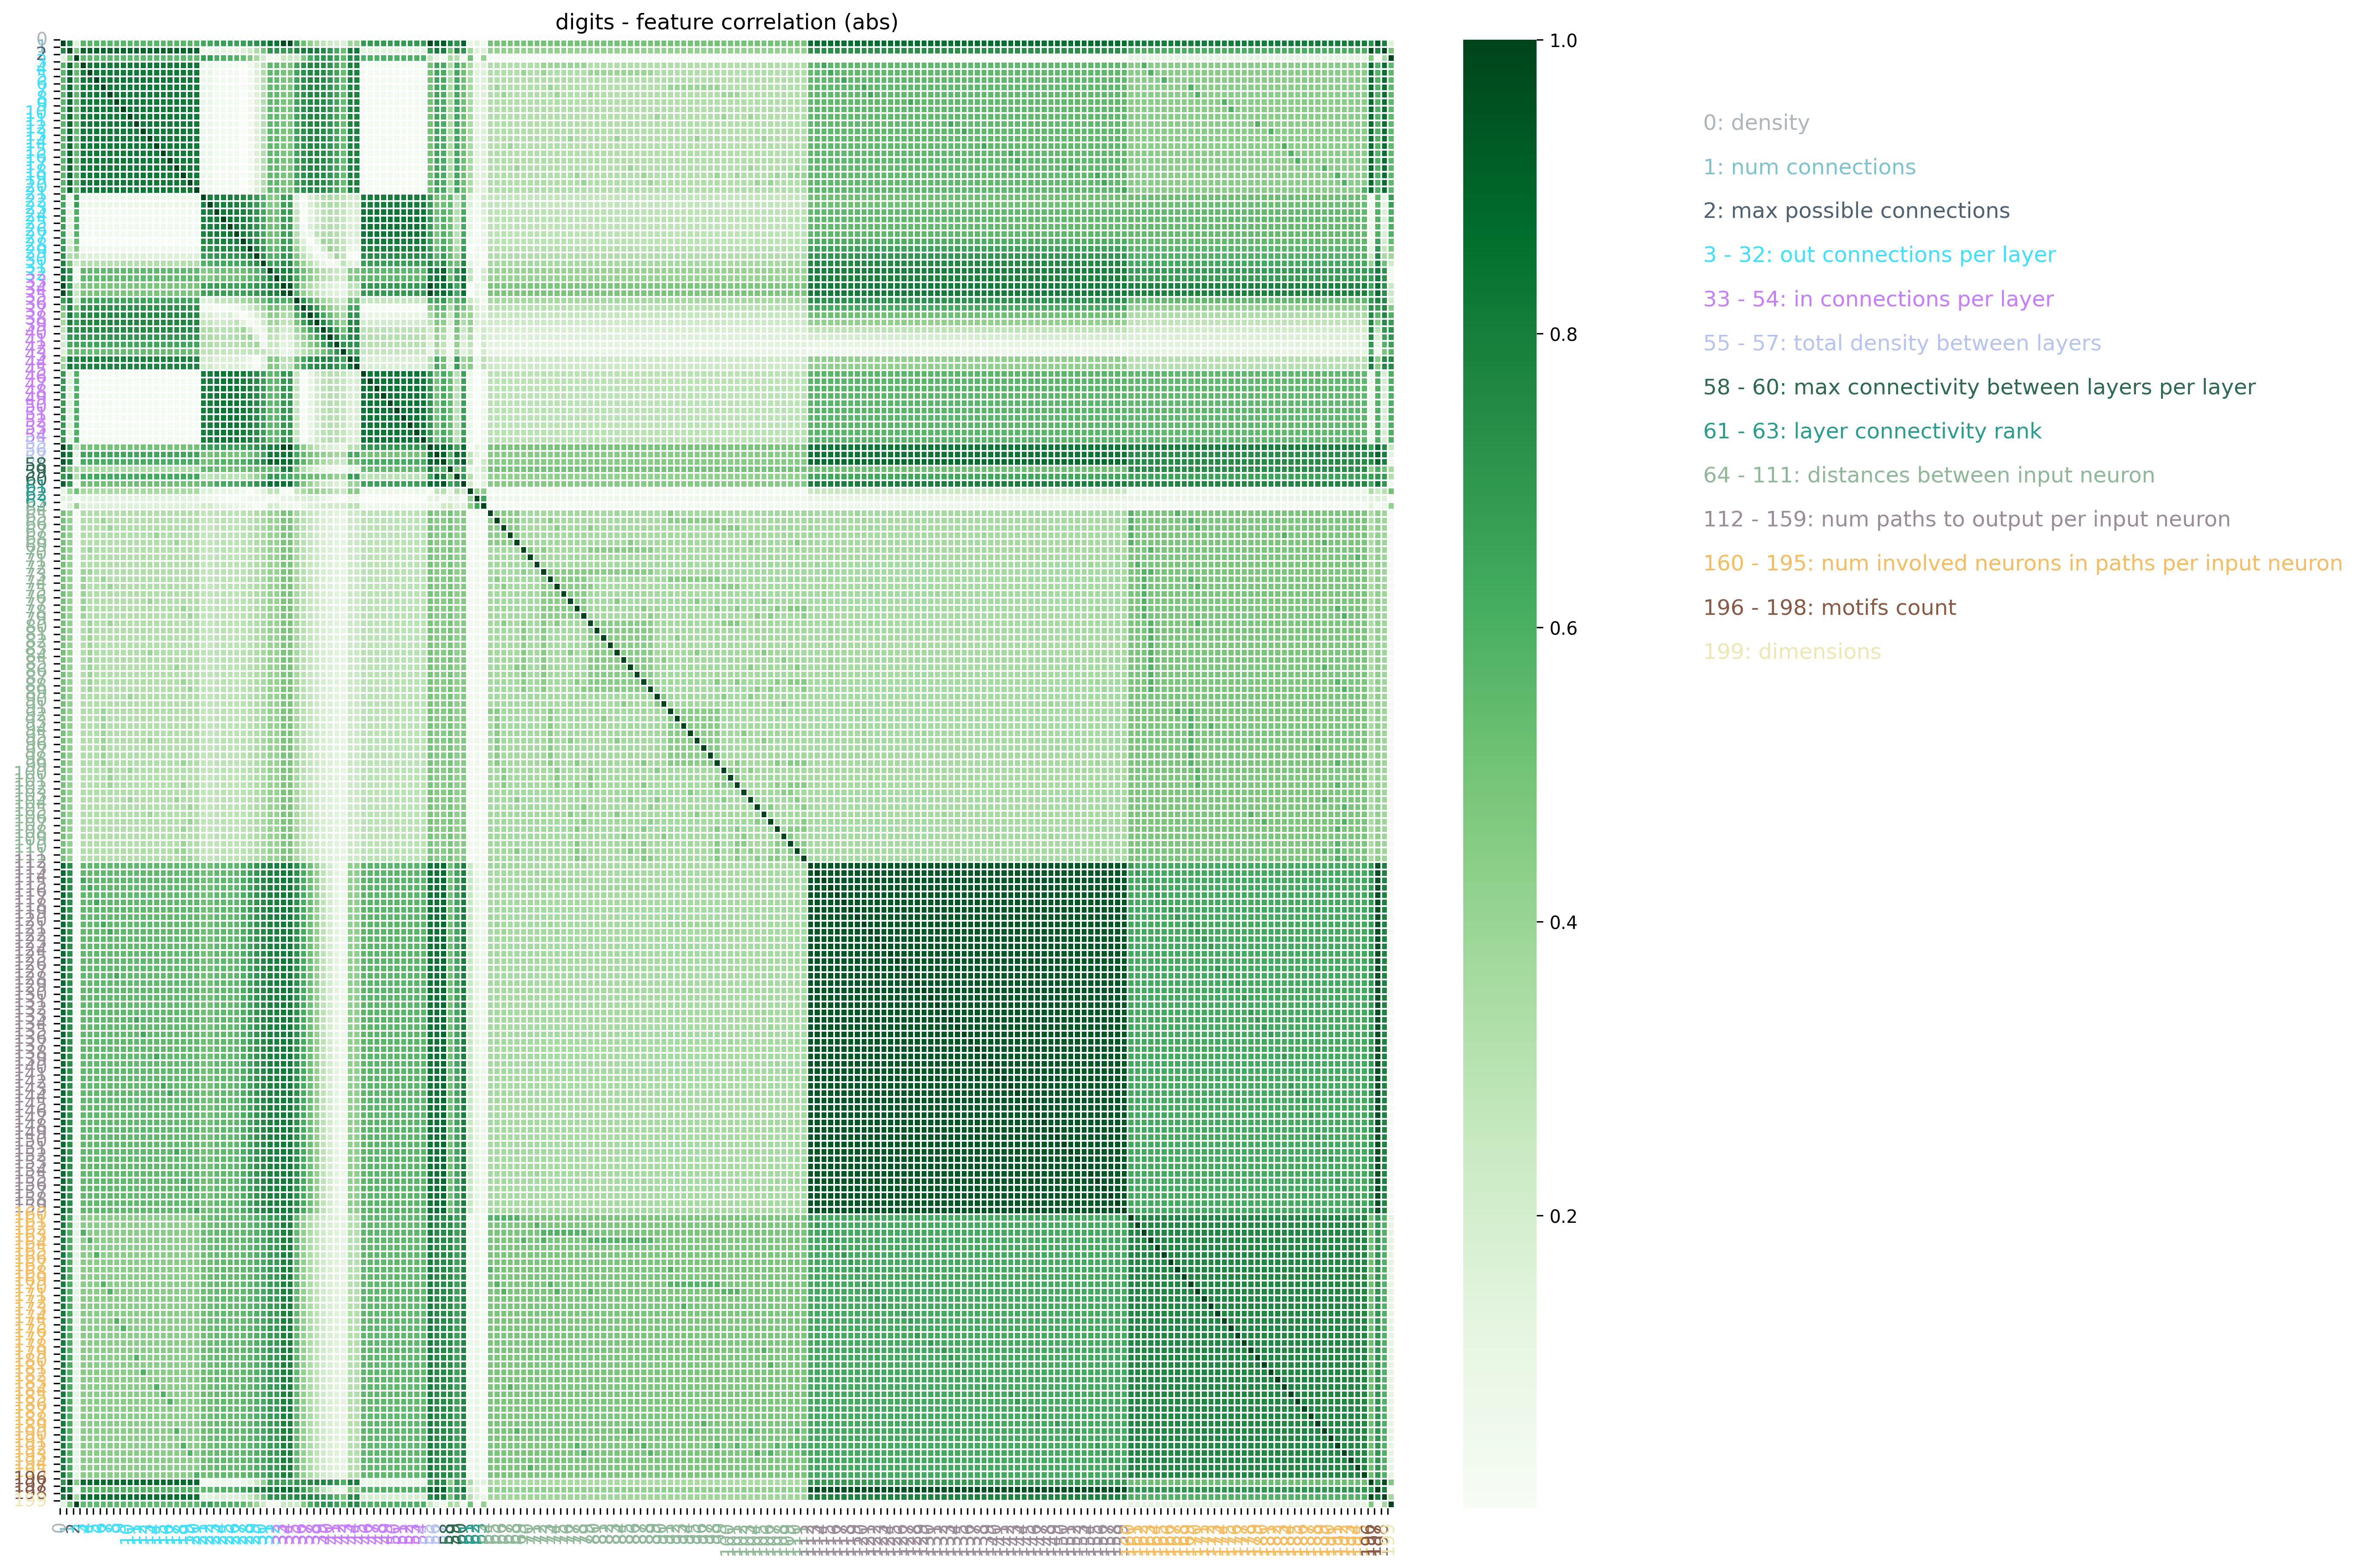

a


In [37]:
NICE_FEATURES = [
    'connectivity_ratio',
    'num_connections',
    'max_possible_connections',
    'out_connections_per_layer',
    'in_connections_per_layer',
    'total_connectivity_ratio_between_layers',
    'max_connectivity_between_layers_per_layer',
    'layer_connectivity_rank',
    'distances_between_input_neuron',
    'num_paths_to_output_per_input_neuron',
    'num_involved_neurons_in_paths_per_input_neuron',
    'motifs_count',
    'dimensions',
    'num_layers',
    'num_neurons'
]
all_ticks = []
for feature_full_name in correlated_features.columns:
    for feature_general_name in NICE_FEATURES:
        if feature_general_name == 'connectivity_ratio' and feature_general_name != feature_full_name:
            continue
        if feature_general_name in feature_full_name:
            all_ticks.append(feature_general_name)
labels = []
for name in all_ticks:
    if name not in labels:
        labels.append(name)
texts = []
colors_ = []
for i, tick in enumerate(labels):
    temp = [i for i, val in enumerate(all_ticks) if val == tick]
    tick = tick.replace('connectivity_ratio', 'density').replace('_', ' ')
    if len(temp) == 1:
        texts.append(f"{temp[0]}: {tick}")
    else:
        texts.append(f"{temp[0]} - {temp[-1]}: {tick}")
    for j in range(temp[-1] - temp[0] + 1):
        colors_.append(COLORS_20[i])

/opt/anaconda3/envs/network_modularity_new/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 7800x7200 with 0 Axes>

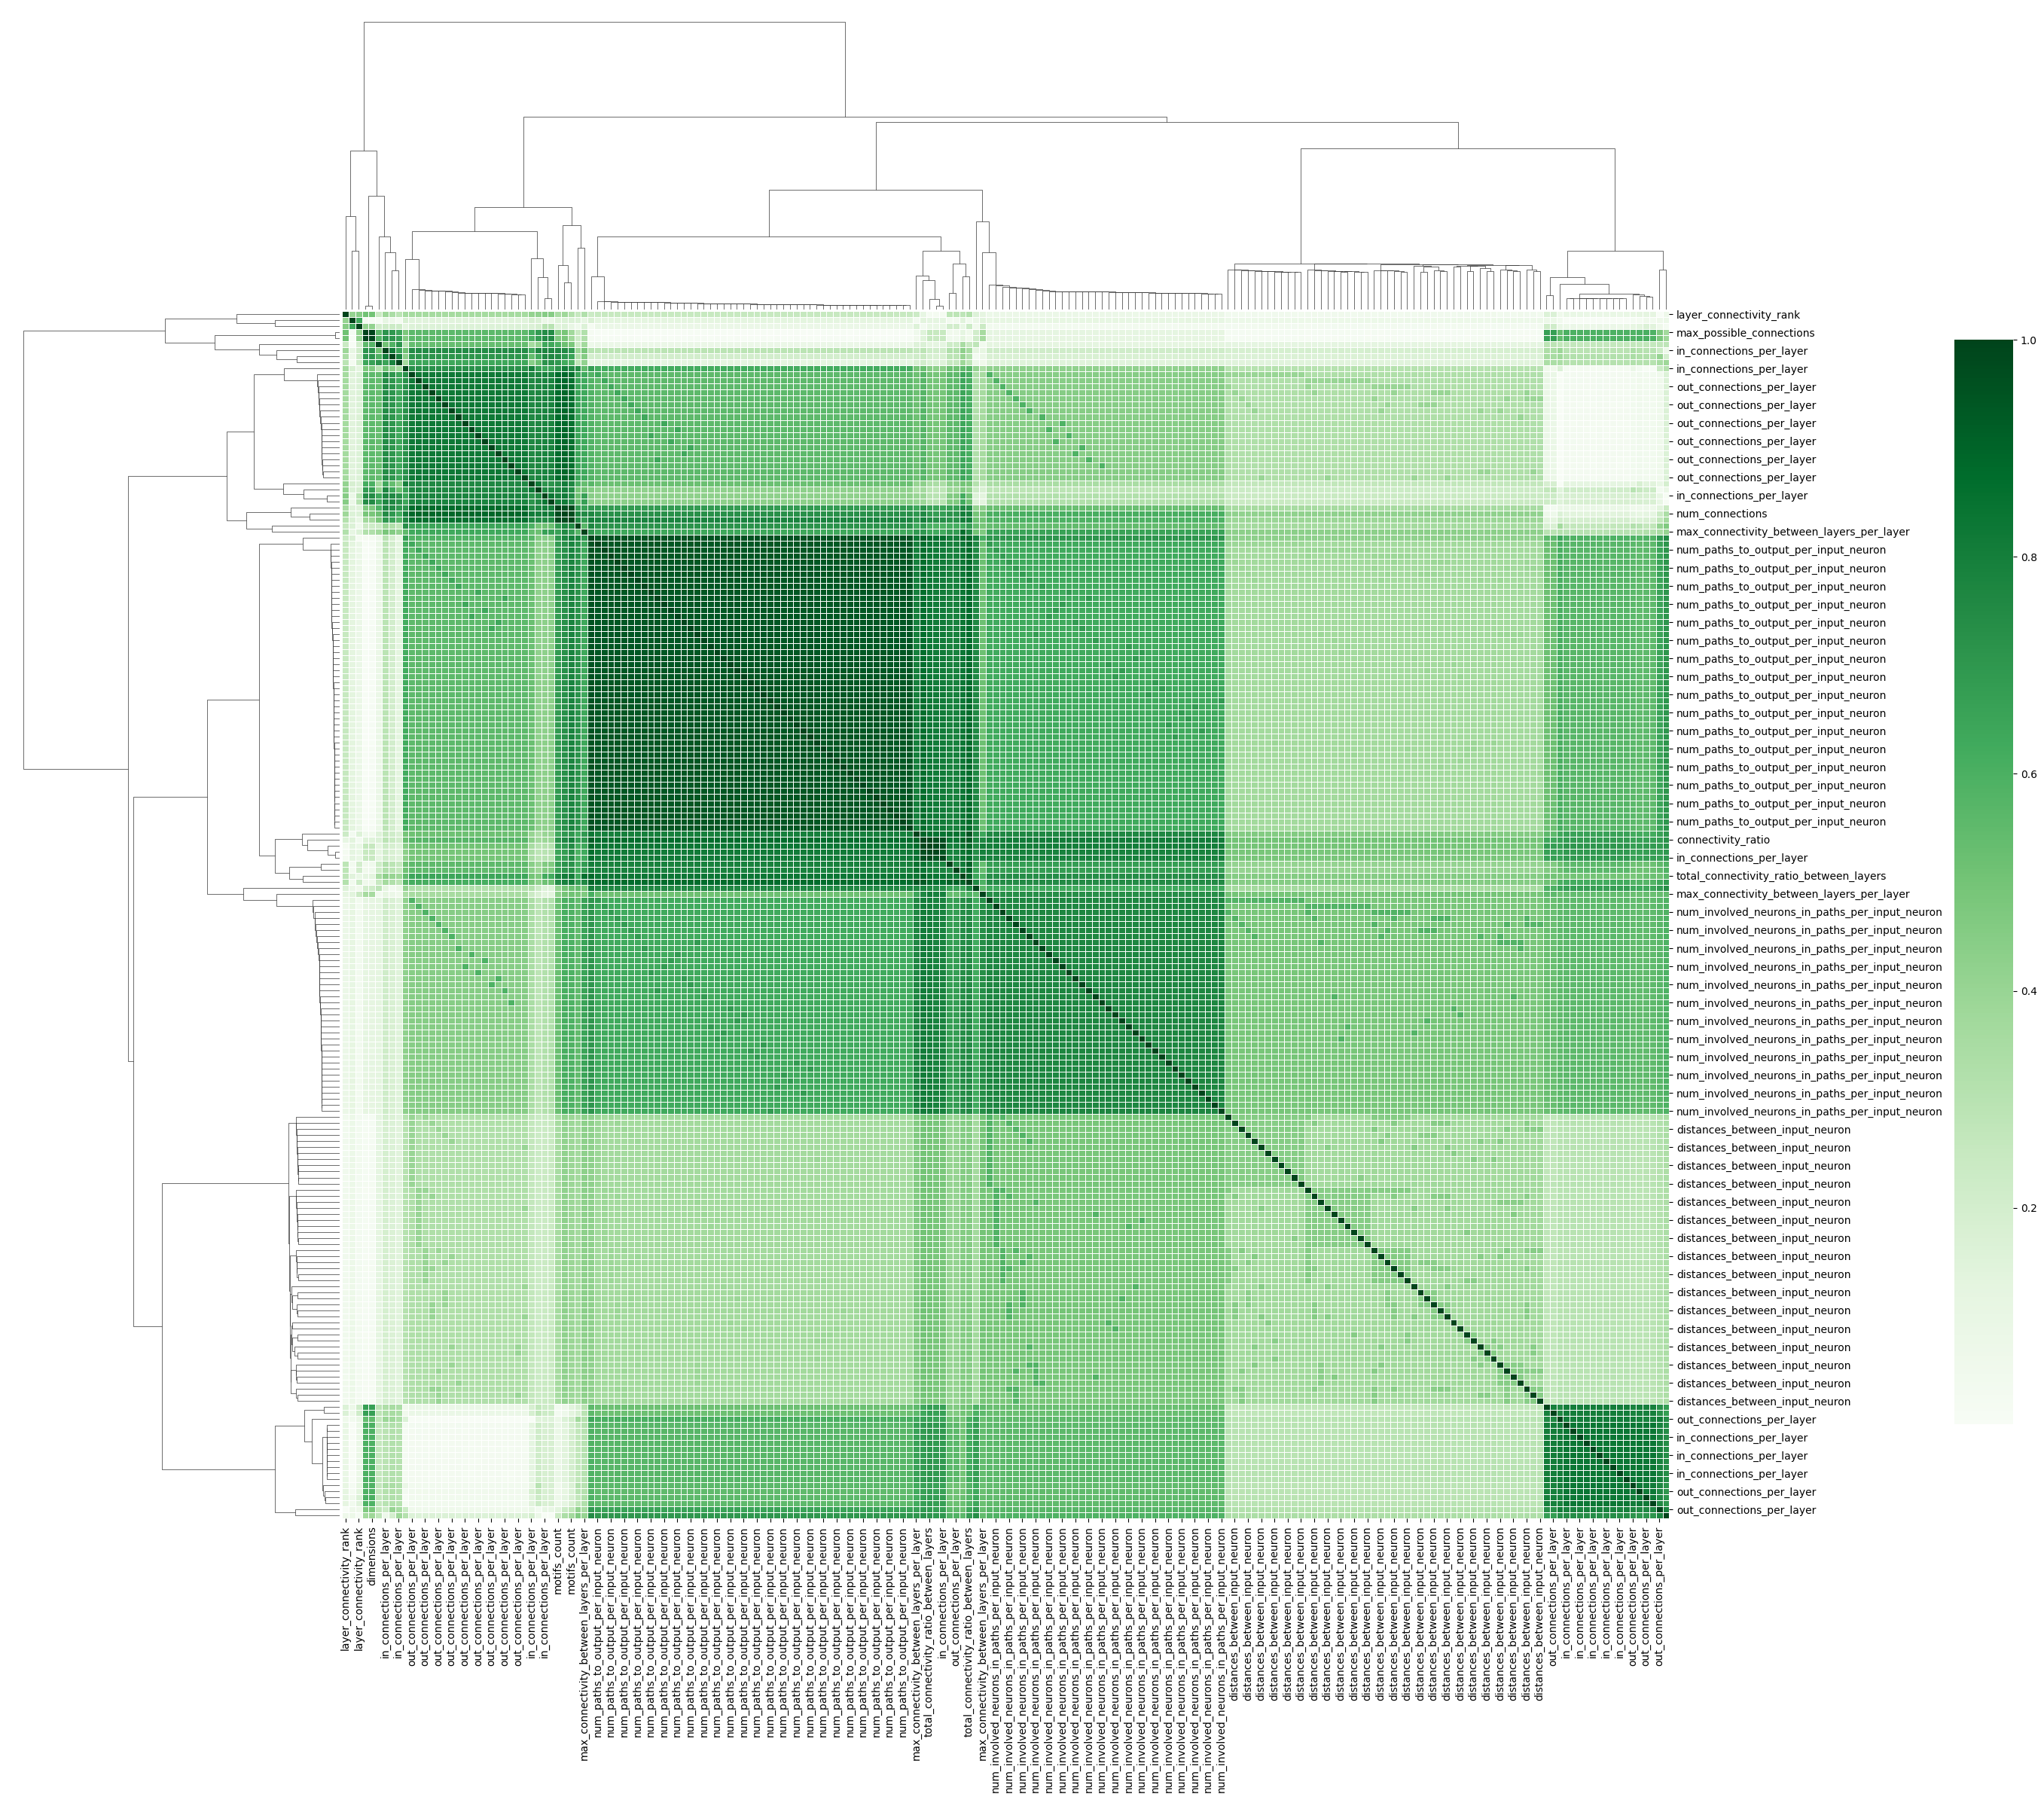

In [38]:
col = 'Blues'

fig = plt.figure(figsize=(18, 12), constrained_layout=True, dpi=300)
gs = fig.add_gridspec(2, 4)
axs = []
axs.append(fig.add_subplot(gs[:, 3]))
axs.append(fig.add_subplot(gs[:, 0:3]))  # large subplot (2 rows, 2 columns)
axtxt, ax = axs
c = sns.color_palette(col, as_cmap=True)
ax = sns.heatmap(correlated_features, linewidth=0.5, cmap=c, )
ax.set_xticks(range(0, correlated_features.shape[0], 1))
ax.set_xticklabels(list((range(0, correlated_features.shape[0], 1))))
ax.set_yticks(range(0, correlated_features.shape[0], 1))
ax.set_yticklabels(list((range(0, correlated_features.shape[0], 1))))
for xtick, yticks, color, in zip(ax.get_xticklabels(), ax.get_yticklabels(), colors_):
    xtick.set_color(color)
    yticks.set_color(color)
axtxt.set_axis_off()
left, width = 0.0, .5
top, height = 0.95, 1
right = left + width
bottom = top - height
for i, (t, c) in enumerate(zip(texts, COLORS_20)):
    axtxt.text(0.5 * (left + right), ((top) - i * 0.03), t,
               horizontalalignment='left',
               verticalalignment='top',
               fontsize=12, color=c,
               #  transform=axtxt.transAxes,
               )
plt.title(f"{task} - feature correlation (abs)")
plt.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation.png")
plt.show()
print('a')


